In [1]:
import seaborn as sns 
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
seed = 1245
test_size = 0.2
k_folds = 5
C = 2
gamma = 0.1
kernel = 'poly'

In [3]:
data = loadmat('Salinas_corrected.mat')['salinas_corrected']
label = loadmat('Salinas_gt.mat')['salinas_gt']
data_reshaped = data.reshape(-1, data.shape[-1])
label_reshaped = label.flatten()
X_train, X_test, y_train, y_test = train_test_split(data_reshaped, label_reshaped, test_size=test_size, random_state=seed)

In [4]:
pipe = Pipeline([
    ('std', StandardScaler()),
    ('clf', SVC(C=C, gamma=gamma, kernel=kernel))
    ])

In [5]:
# # Gird search to find the best hyperparameters
# parameters = [
#     {
#         'dr__n_components': [32, 64, 128, 160],
#         'clf__C': [1, 2, 4, 6],
#         'clf__gamma': [0.001, 0.01, 0.1, 1, 2, 4, 6],
#         'clf__kernel': ['rbf', 'poly']
#     }
# ]
# model = GridSearchCV(pipe, parameters, refit = True, cv = 5, verbose = 1, n_jobs = -1)
# model.fit(X_train, y_train)
# print('Best hyperparameters: ', model.best_params_)
# print('Best performance: : ', model.best_score_)

# max_depth = model.best_params_['clf__max_depth']
# n_estimators = model.best_params_['clf__n_estimators']

In [6]:
# KFold
y_preds = []
label_preds = []
pred_test_scores = []

kfolds = KFold(n_splits=k_folds, shuffle=True, random_state=seed)

for k, (train_index, test_index) in enumerate(kfolds.split(X_train)):
    X_train_fold, y_train_fold = X_train[train_index], y_train[train_index]
    X_test_fold, y_test_fold = X_train[test_index], y_train[test_index]
    pipe.fit(X_train_fold, y_train_fold)

    y_pred = pipe.predict(X_test)
    y_pred_fold = pipe.predict(X_test_fold)
    label_pred = pipe.predict(data_reshaped)

    pred_test_score = accuracy_score(y_test, y_pred)
    pred_valid_score = accuracy_score(y_test_fold, y_pred_fold)

    y_preds.append(y_pred)
    label_preds.append(label_pred)
    pred_test_scores.append(pred_test_score)
    
    print("Fold ", k, "Test set: ", round(pred_test_score, 4), "Validation Set: ", round(pred_valid_score, 4))

Fold  0 Test set:  0.9251 Validation Set:  0.9289
Fold  1 Test set:  0.9242 Validation Set:  0.9252
Fold  2 Test set:  0.9265 Validation Set:  0.9262
Fold  3 Test set:  0.9255 Validation Set:  0.9235
Fold  4 Test set:  0.9257 Validation Set:  0.9287


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     11327
           1       0.93      0.90      0.92       419
           2       0.96      0.95      0.95       720
           3       0.82      0.90      0.86       394
           4       0.86      0.90      0.88       288
           5       0.88      0.96      0.92       529
           6       0.92      0.95      0.93       781
           7       0.95      0.94      0.94       730
           8       0.86      0.90      0.88      2264
           9       0.94      0.97      0.95      1260
          10       0.94      0.94      0.94       675
          11       0.91      0.91      0.91       211
          12       0.88      0.95      0.91       384
          13       0.85      0.86      0.85       212
          14       0.89      0.83      0.86       200
          15       0.85      0.81      0.83      1454
          16       0.93      0.94      0.94       373

    accuracy              

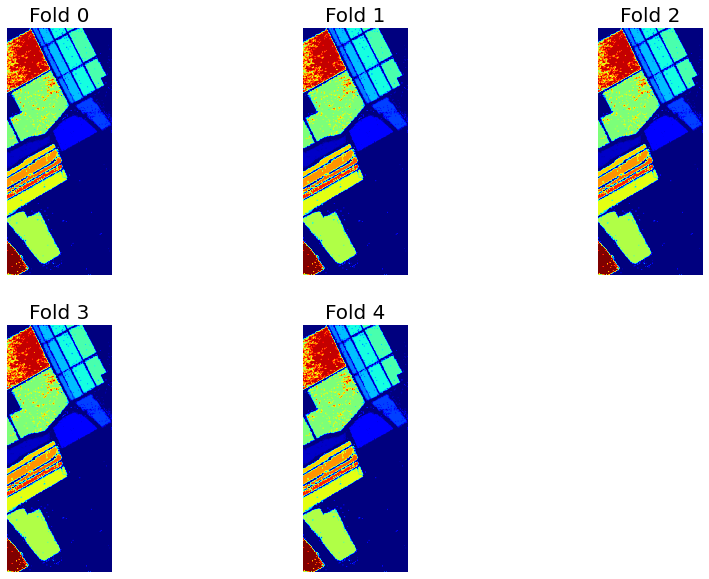

In [8]:
fig = plt.figure(figsize=(15, 10))
for k in range(k_folds):
    ax = plt.subplot(2, 3, k + 1)
    ax.set_title(f"Fold {k}", fontsize=20)
    plt.axis('off')
    plt.imshow(label_preds[0].reshape(label.shape[0], label.shape[1]), cmap='jet')

<AxesSubplot:>

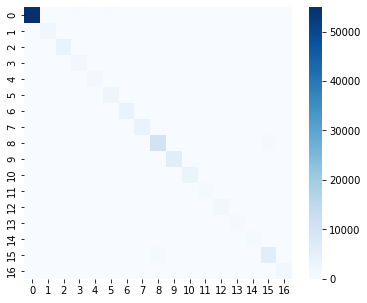

In [9]:
best_fold = pred_test_scores.index(max(pred_test_scores))
fig = plt.figure(figsize=(6, 5))
cm = confusion_matrix(label_reshaped, label_preds[best_fold])
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues")